# Preprocessing

Imports

In [ ]:
import numpy             as np
import matplotlib.pyplot as plt
import tensorflow        as tf

In [ ]:
from sklearn.metrics import confusion_matrix

Importing Drive and unzipinig the data

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')


# REAL DATA SET
#!wget https://data.mendeley.com/public-files/datasets/rscbjbr9sj/files/5699a1d8-d1b6-45db-bb92-b61051445347/file_downloaded


# SECOND DATA SET
#!wget https://drive.google.com/uc?id=1rPo3ZCc83BROZoxSzVDyYzgkJOfgL02U&export=download
#!unzip drive/MyDrive/Eye/EyeD
!unzip drive/MyDrive/EyeD
#!tar xvzf drive/MyDrive/Eye/file_downloaded

Streaming output truncated to the last 5000 lines.
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-8076309-3.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-224974-31.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-3541867-4.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-7599844-1.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-6625388-3.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-8086850-114.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-5811898-40.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-8986660-45.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-1283307-15.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-9540117-28.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-7563760-33.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-5443411-6.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-5768756-12.jpeg  
  inflating: OCT2017/train/DRUSSEND/DRUSEN/DRUSEN-2257047-100.jpeg  
 

Determining the batch size

In [ ]:
batch_size = 1

Defining the data generators

In [ ]:

Normal_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
    rotation_range     = 8,
    width_shift_range  = 0.1,
    height_shift_range = 0.1
)

CNV_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
    rotation_range     = 8,
    width_shift_range  = 0.1,
    height_shift_range = 0.1
)

DRUSSEN_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
    rotation_range     = 8,
    width_shift_range  = 0.1,
    height_shift_range = 0.1
)

In [ ]:
Normal_data = Normal_datagen.flow_from_directory(
    'OCT2017/train/NORMALD',
    target_size = (256,256),
    batch_size  = batch_size,
    color_mode  = "grayscale",
    class_mode  = None,
    shuffle     = True
)

Found 26315 images belonging to 1 classes.


In [ ]:
CNV_data = CNV_datagen.flow_from_directory(
    'OCT2017/train/CNVD',
    target_size = (256,256),
    batch_size  = batch_size,
    color_mode  = "grayscale",
    class_mode  = None,
    shuffle     = True
)

Found 37205 images belonging to 1 classes.


In [ ]:
DRUSSEN_data = DRUSSEN_datagen.flow_from_directory(
    'OCT2017/train/DRUSSEND',
    target_size = (256,256),
    batch_size  = batch_size,
    color_mode  = "grayscale",
    class_mode  = None,
    shuffle     = True
)

Found 8616 images belonging to 1 classes.


In [ ]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255
)

test_data = test_datagen.flow_from_directory(
    'OCT2017/test/V',
    target_size = (256,256),
    batch_size  = batch_size ,
    color_mode  = "grayscale",
    class_mode  = "categorical",
)

Found 750 images belonging to 3 classes.


#Building the Model

Defining the Custom Activation Function

In [ ]:
# custom activation function
def custom_activation(output):
  logexpsum = tf.keras.backend.sum(tf.keras.backend.exp(output), axis=-1, keepdims=True)
  result    = logexpsum / (logexpsum + 1.0)

  return result

Defining Discriminator and the Classification model

In [ ]:
def define_discriminator(in_shape=(256,256,1), n_classes=3):
  in_image = tf.keras.layers.Input(shape=in_shape)

  fe = tf.keras.layers.Conv2D(128, (3,3), strides = (1,1), padding = "same")(in_image)
  fe = tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = (2,2))(fe)
  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)

  #fe = tf.keras.layers.Dropout(0.7)(fe)

  fe = tf.keras.layers.Conv2D(128, (3,3), strides = (1,1), padding = "same")(fe)
  fe = tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = (2,2))(fe)
  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)

  #fe = tf.keras.layers.Dropout(0.7)(fe)

  fe = tf.keras.layers.Conv2D(128, (3,3), strides = (1,1), padding = "same")(fe)
  fe = tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = (2,2))(fe)
  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)

  #fe = tf.keras.layers.Dropout(0.7)(fe)

  fe = tf.keras.layers.Conv2D(128, (3,3), strides = (1,1), padding = "same")(fe)
  fe = tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = (2,2))(fe)
  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)

  fe = tf.keras.layers.Flatten()(fe)
  fe = tf.keras.layers.Dropout(0.4)(fe)
  fe = tf.keras.layers.Dense(n_classes)(fe)

  c_out_layer = tf.keras.layers.Activation("softmax")(fe)
  c_model     = tf.keras.models.Model(in_image, c_out_layer)
  c_model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0002,  beta_1 = 0.5), metrics = ["accuracy"])

  d_out_layer = tf.keras.layers.Lambda(custom_activation)(fe)
  d_model     = tf.keras.models.Model(in_image, d_out_layer)
  d_model.compile(loss = "binary_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0002, beta_1 = 0.5))
  return d_model, c_model

Defining the Generator

In [ ]:
def define_generator(latent_dim):
  in_lat  = tf.keras.layers.Input(shape=(latent_dim,))
  n_nodes = 128 * 8 * 8

  gen = tf.keras.layers.Dense(n_nodes)(in_lat)
  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)
  gen = tf.keras.layers.Reshape((8, 8, 128))(gen)

  gen = tf.keras.layers.Conv2DTranspose(128, (4,4), strides = (2,2), padding = "same")(gen)
  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)

  gen = tf.keras.layers.Conv2DTranspose(128, (4,4), strides = (2,2), padding = "same")(gen)
  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)

  gen = tf.keras.layers.Conv2DTranspose(128, (4,4), strides = (2,2), padding = "same")(gen)
  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)

  gen = tf.keras.layers.Conv2DTranspose(128, (4,4), strides = (2,2), padding = "same")(gen)
  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)

  gen = tf.keras.layers.Conv2DTranspose(128, (4,4), strides = (2,2), padding = "same")(gen)
  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)

  out_layer = tf.keras.layers.Conv2D(1, (7,7), activation = "tanh", padding = "same")(gen)

  model = tf.keras.models.Model(in_lat, out_layer)
  return model

Defining GAN

In [ ]:
def define_gan(g_model, d_model):
  d_model.trainable = False

  gan_output = d_model(g_model.output)
  model      = tf.keras.models.Model(g_model.input, gan_output)
  opt        = tf.keras.optimizers.Adam(learning_rate = 0.0002, beta_1 = 0.5)
  model.compile(loss="binary_crossentropy", optimizer=opt)

  return model

How to generate real samples

In [ ]:
def generate_real_samples():
  X_Normal  = Normal_data.next()
  Y_Normal  = np.array([0,0,1] * X_Normal.shape[0]).reshape(X_Normal.shape[0], -1)
  X_CNV     = CNV_data.next()
  Y_CNV     = np.array([1,0,0] * X_CNV.shape[0]).reshape(X_CNV.shape[0], -1)
  X_DRUSSEN = DRUSSEN_data.next()
  Y_DRUSSEN = np.array([0,1,0] * X_DRUSSEN.shape[0]).reshape(X_DRUSSEN.shape[0], -1)

  X       = np.concatenate([ X_Normal, X_CNV, X_DRUSSEN])
  labels  = np.concatenate([ Y_Normal, Y_CNV, Y_DRUSSEN])
  y       = np.ones((X.shape[0], 1))

  return [X, labels], y

How to generate fake samples

In [ ]:
def generate_latent_points(latent_dim, n_samples):
  z_input = np.random.randn(latent_dim * n_samples)
  z_input = z_input.reshape(n_samples, latent_dim)
  return z_input

def generate_fake_samples(generator, latent_dim, n_samples):
  z_input = generate_latent_points(latent_dim, n_samples)
  images  = generator.predict(z_input)
  y       = np.zeros((n_samples, 1))
  return images, y

#Training the Model

Defining the train function

In [ ]:
def train(g_model, d_model, c_model, gan_model, latent_dim, n_epochs , batch_size):
  bat_per_epo = int(72136 / (3 * batch_size))

  for i in range(bat_per_epo * n_epochs):
    [Xsup_real, ysup_real], y_real = generate_real_samples()
    c_loss, c_acc                  = c_model.train_on_batch(Xsup_real, ysup_real)

    d_loss1        = d_model.train_on_batch(Xsup_real, y_real)
    X_fake, y_fake = generate_fake_samples(g_model, latent_dim, 3 * batch_size)
    d_loss2        = d_model.train_on_batch(X_fake, y_fake)

    X_gan, y_gan = generate_latent_points(latent_dim, 3 * batch_size), np.ones((3 * batch_size, 1))
    g_loss       = gan_model.train_on_batch(X_gan, y_gan)

    print(">%d, c[%.3f,%.0f], d[%.3f,%.3f], g[%.3f]" % (i+1, c_loss, c_acc*100, d_loss1, d_loss2, g_loss))

  return c_model.evaluate(test_data)

Defining the models and latent dimension

In [ ]:
latent_dim = 100

d_model, c_model = define_discriminator()
g_model          = define_generator(latent_dim)
gan_model        = define_gan(g_model, d_model)

Loading model weights

In [ ]:
d_model.load_weights('/content/drive/MyDrive/GAN_weights/saved_model/c_model/w')
c_model.load_weights('/content/drive/MyDrive/GAN_weights/saved_model/d_model/w')
g_model.load_weights('/content/drive/MyDrive/GAN_weights/saved_model/g_model/w')

Training the model and saving the Accuracy and Loss of test data in history

In [ ]:
history = list()

In [ ]:
history.append(train(g_model, d_model, c_model, gan_model, latent_dim, n_epochs = 1, batch_size = batch_size))

>1, c[0.126,97], d[0.561,0.434], g[2.080]
>2, c[0.398,79], d[0.590,0.387], g[1.894]
>3, c[0.294,88], d[0.369,0.441], g[2.213]
>4, c[0.219,90], d[0.555,0.501], g[2.743]
>5, c[0.293,88], d[0.584,0.319], g[1.980]
>6, c[0.315,92], d[0.429,0.475], g[1.774]
>7, c[0.509,83], d[0.625,0.706], g[2.218]
>8, c[0.259,94], d[0.500,0.444], g[2.127]
>9, c[0.304,90], d[0.446,0.358], g[2.607]
>10, c[0.277,90], d[0.652,0.575], g[2.136]
>11, c[0.248,92], d[0.414,0.415], g[2.477]
>12, c[0.428,83], d[1.128,0.526], g[1.943]
>13, c[0.193,92], d[0.725,0.580], g[2.171]
>14, c[0.287,88], d[0.680,0.599], g[2.154]
>15, c[0.248,88], d[0.593,0.537], g[2.270]
>16, c[0.440,88], d[0.935,0.406], g[1.730]
>17, c[0.312,85], d[0.391,0.467], g[1.979]
>18, c[0.245,88], d[0.479,0.586], g[2.242]
>19, c[0.290,85], d[0.430,0.336], g[2.193]
>20, c[0.197,94], d[0.627,0.435], g[2.190]
>21, c[0.270,88], d[0.481,0.502], g[2.261]
>22, c[0.230,90], d[0.506,0.561], g[2.365]
>23, c[0.319,92], d[0.539,0.355], g[2.320]
>24, c[0.268,85], d[

Evaluting C-Model on the test data

In [ ]:
c_model.evaluate(test_data)

16/16 [==============================] - 33s 263ms/step - loss: 0.0732 - accuracy: 0.9947


[0.07318370789289474, 0.9946666955947876]

Saving Weights

In [ ]:
!mkdir -p saved_model/d_model/w
!mkdir -p saved_model/c_model/w
!mkdir -p saved_model/g_model/w

d_model.save_weights('/content/drive/MyDrive/GAN_weights/saved_model/c_model/w')
c_model.save_weights('/content/drive/MyDrive/GAN_weights/saved_model/d_model/w')
g_model.save_weights('/content/drive/MyDrive/GAN_weights/saved_model/g_model/w')

# Testing Generative Model

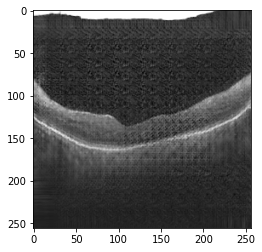

In [ ]:
fake = g_model.predict(generate_latent_points(100, 2))
plt.imshow(fake[0,:,:,0], cmap= "gray")

In [ ]:
#y_pred = c_model.predict(test_data)


In [ ]:
predicted_categories = tf.argmax(y_pred, axis=1)
true=[]
predicted=[]
for index , (image,label) in enumerate(test_data):
  if index== 750:
    break
  true.append(label)
  predicted.append(c_model.predict(image))

In [ ]:
predicted

[array([[3.23933316e-04, 3.13747972e-02, 9.68301296e-01],
        [6.83667734e-02, 9.31625843e-01, 7.37663231e-06],
        [9.17367544e-03, 9.90825951e-01, 3.80835587e-07],
        [9.81731713e-01, 6.27443567e-03, 1.19938627e-02],
        [3.93470144e-03, 9.93104637e-01, 2.96065677e-03],
        [3.60891297e-02, 9.63438511e-01, 4.72336600e-04],
        [1.32459044e-01, 8.42822850e-01, 2.47180760e-02],
        [8.83904397e-01, 4.53780852e-02, 7.07175210e-02],
        [1.04758783e-05, 7.98656547e-04, 9.99190867e-01],
        [9.07893181e-01, 8.25031549e-02, 9.60358512e-03],
        [1.43693251e-04, 2.11205240e-03, 9.97744322e-01],
        [8.65684927e-01, 1.04201905e-01, 3.01132128e-02],
        [1.11266151e-01, 6.35348856e-01, 2.53384978e-01],
        [6.14463992e-04, 1.18442178e-02, 9.87541258e-01],
        [9.81140137e-01, 1.50535051e-02, 3.80639243e-03],
        [5.26466360e-03, 2.65363976e-02, 9.68198895e-01],
        [9.57646407e-05, 3.27521935e-03, 9.96628940e-01],
        [2.620

In [ ]:

#true_categories = tf.concat(z[0:750], axis=0)
predicted_categories = tf.argmax(predicted, axis=1)

In [ ]:
true_cat= []
for item in true:
  true_cat.append(np.argmax(item))

In [ ]:
predicted_cat= []
for item in predicted:
  predicted_cat.append(np.argmax(item))
confusion_matrix(predicted_cat, true_cat)

array([[248,   0,   0],
       [  1, 250,   2],
       [  1,   0, 248]])

In [ ]:
true_cat


[2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 1,
 1,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 0,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 0,
 2,


In [ ]:
predicted_cat

[2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 1,
 1,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 0,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 0,
 2,
